In [1]:
import pandas as pd

In [2]:
import glob

# jan_25 = pd.read_csv("../original_data/traffic_density_202501.csv")

files_2024 = []
for month in range(1, 13):
    file_path = f"../original_data/traffic_density_2024{month:02d}.csv"
    files_2024.append(pd.read_csv(file_path))

combined_2024 = pd.concat(files_2024, ignore_index=True)

In [3]:
# jan_25.head()

combined_2024.head()

,DATE_TIME,LATITUDE,LONGITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2024-01-01 00:00:00,41.338806,27.965698,sx7ghm,31,121,76,9
1,2024-01-01 00:00:00,41.157532,29.174194,sxkdpu,69,89,81,2
2,2024-01-01 00:00:00,41.058655,28.361206,sxk1t6,22,145,80,23
3,2024-01-01 00:00:00,40.954285,29.086304,sxk8vz,1,75,30,45
4,2024-01-01 00:00:00,41.003723,28.855591,sxk928,4,37,20,29


In [4]:
# jan_25 = jan_25.drop(columns=["GEOHASH", "MINIMUM_SPEED", "MAXIMUM_SPEED"])

combined_2024 = combined_2024.drop(columns=["GEOHASH", "MINIMUM_SPEED", "MAXIMUM_SPEED"])

In [5]:
# jan_25.head()
# print(jan_25.describe())
# jan_25.info()

combined_2024.head()
print(combined_2024.describe())
combined_2024.info()

           LATITUDE     LONGITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
count  1.908077e+07  1.908077e+07   1.908077e+07        1.908077e+07
mean   4.106297e+01  2.888705e+01   5.653555e+01        1.082300e+02
std    1.009562e-01  3.565224e-01   2.590732e+01        1.392274e+02
min    4.076752e+01  2.796570e+01   1.000000e+00        1.000000e+00
25%    4.099823e+01  2.869080e+01   3.300000e+01        2.000000e+01
50%    4.105865e+01  2.893250e+01   5.400000e+01        5.800000e+01
75%    4.113007e+01  2.915222e+01   8.000000e+01        1.390000e+02
max    4.134430e+01  2.963562e+01   2.100000e+02        2.056000e+03
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19080773 entries, 0 to 19080772
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DATE_TIME           object 
 1   LATITUDE            float64
 2   LONGITUDE           float64
 3   AVERAGE_SPEED       int64  
 4   NUMBER_OF_VEHICLES  int64  
dtypes: float64(2), int64(2), obje

In [6]:
# jan_25['DATE'] = pd.to_datetime(jan_25['DATE_TIME']).dt.date
# jan_25.drop(columns = ['DATE_TIME'], inplace = True)

# daily_data = jan_25.groupby(['DATE', 'LATITUDE', 'LONGITUDE']).agg({
#     'AVERAGE_SPEED': 'mean',
#     'NUMBER_OF_VEHICLES': 'sum'
# }).reset_index()

combined_2024['DATE'] = pd.to_datetime(combined_2024['DATE_TIME']).dt.date
combined_2024.drop(columns = ['DATE_TIME'], inplace = True)

daily_data_2024 = combined_2024.groupby(['DATE', 'LATITUDE', 'LONGITUDE']).agg({
    'AVERAGE_SPEED': 'mean',
    'NUMBER_OF_VEHICLES': 'sum'
}).reset_index()


# print(daily_data.head())
# print(jan_25.describe())
# jan_25.info()

print(daily_data_2024.head())
print(daily_data_2024.describe())
daily_data_2024.info()

         DATE   LATITUDE  LONGITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
0  2024-01-01  40.767517  29.426880      36.166667                 400
1  2024-01-01  40.773010  29.415894      63.166667                 143
2  2024-01-01  40.773010  29.426880      53.750000                 449
3  2024-01-01  40.778503  29.415894      64.291667                 416
4  2024-01-01  40.783997  29.415894      54.083333                1674
            LATITUDE      LONGITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
count  836072.000000  836072.000000  836072.000000       836072.000000
mean       41.063980      28.887371      56.632581         2470.017105
std         0.101374       0.358513      24.703159         2808.755172
min        40.767517      27.965698       1.000000            1.000000
25%        40.998230      28.690796      34.208333          572.000000
50%        41.058655      28.932495      54.000000         1491.000000
75%        41.135559      29.152222      79.304348         3274.000000
max   

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

districts = gpd.read_file("../data/istanbul-districts.json") 

points = gpd.GeoDataFrame(
    daily_data_2024,
    geometry=gpd.points_from_xy(daily_data_2024["LONGITUDE"], daily_data_2024["LATITUDE"]),
    crs="EPSG:4326"
)

points_with_district = gpd.sjoin(
    points,
    districts[["name", "geometry"]].rename(columns={"name": "DISTRICT"}),
    how="left",
    predicate="within"
)

daily_data_2024["DISTRICT"] = points_with_district["DISTRICT"]

In [8]:
daily_data_2024.head()

,DATE,LATITUDE,LONGITUDE,AVERAGE_SPEED,NUMBER_OF_VEHICLES,DISTRICT
0,2024-01-01,40.767517,29.426880,36.166667,400,NaN
1,2024-01-01,40.773010,29.415894,63.166667,143,NaN
2,2024-01-01,40.773010,29.426880,53.750000,449,NaN
3,2024-01-01,40.778503,29.415894,64.291667,416,NaN
4,2024-01-01,40.783997,29.415894,54.083333,1674,NaN


In [9]:
code_dict = {
    "Adalar": 0,
    "Arnavutköy": 1,
    "Ataşehir": 2,
    "Avcılar": 3,
    "Bağcılar": 4,
    "Bahçelievler": 5,
    "Bakırköy": 6,
    "Başakşehir": 7,
    "Bayrampaşa": 8,
    "Beşiktaş": 9,
    "Beykoz": 10,
    "Beylikdüzü": 11,
    "Beyoğlu": 12,
    "Çatalca": 13,
    "Çekmeköy": 14,
    "Esenler": 15,
    "Esenyurt": 16,
    "Eyüpsultan": 17,
    "Fatih": 18,
    "Gaziosmanpaşa": 19,
    "Güngören": 20,
    "Kadıköy": 21,
    "Kağıthane": 22,
    "Kartal": 23,
    "Küçükçekmece": 24,
    "Maltepe": 25,
    "Pendik": 26,
    "Sancaktepe": 27,
    "Sarıyer": 28,
    "Şile": 29,
    "Şişli": 30,
    "Sultanbeyli": 31,
    "Sultangazi": 32,
    "Tuzla": 33,
    "Ümraniye": 34,
    "Üsküdar": 35,
    "Zeytinburnu": 36,
    "Silivri": 37,
    "Çekmeköy": 38
}

In [10]:
daily_data_2024["DISTRICT"] = daily_data_2024["DISTRICT"].apply(lambda x: code_dict[x] if x in code_dict else None).astype("Int64")

daily_data_2024.dropna(subset=["DISTRICT"], inplace=True)

In [11]:
daily_data_2024.head()
daily_data_2024.drop(columns=["LATITUDE", "LONGITUDE"], inplace=True)

In [12]:
daily_data_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751311 entries, 20 to 836056
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATE                751311 non-null  object 
 1   AVERAGE_SPEED       751311 non-null  float64
 2   NUMBER_OF_VEHICLES  751311 non-null  int64  
 3   DISTRICT            751311 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(1)
memory usage: 29.4+ MB


In [13]:
daily_data_2024.head()

,DATE,AVERAGE_SPEED,NUMBER_OF_VEHICLES,DISTRICT
20,2024-01-01,19.666667,363,33
22,2024-01-01,44.500000,899,33
23,2024-01-01,45.708333,1169,33
25,2024-01-01,75.083333,2613,33
27,2024-01-01,45.916667,1167,33


In [14]:
print(daily_data_2024[['NUMBER_OF_VEHICLES', 'AVERAGE_SPEED']].describe())

       NUMBER_OF_VEHICLES  AVERAGE_SPEED
count       751311.000000  751311.000000
mean          2525.545626      55.814378
std           2867.753893      24.961059
min              1.000000       1.000000
25%            578.000000      33.125000
50%           1531.000000      52.291667
75%           3364.000000      78.875000
max          31379.000000     192.000000


In [15]:
q_low,  q_hi   = 0.05, 0.95
nv_lo, nv_hi   = daily_data_2024["NUMBER_OF_VEHICLES"].quantile([q_low, q_hi])
sp_lo, sp_hi   = daily_data_2024["AVERAGE_SPEED"].quantile([q_low, q_hi])

daily_data_2024["v_norm"]   = ((daily_data_2024["NUMBER_OF_VEHICLES"] - nv_lo) / (nv_hi - nv_lo)).clip(0, 1)
daily_data_2024["s_norm"]   = ((daily_data_2024["AVERAGE_SPEED"]     - sp_lo) / (sp_hi - sp_lo)).clip(0, 1)

In [16]:
daily_data_2024["s_inv"] = 1 - daily_data_2024["s_norm"]

In [17]:
daily_data_2024["congestion"] = 0.5*daily_data_2024["v_norm"] + 0.5*daily_data_2024["s_inv"]

In [18]:
daily_data_2024["congestion"] = daily_data_2024["congestion"].clip(0, 1)
daily_data_2024["congestion"] = daily_data_2024["congestion"].round(3)

In [19]:
daily_data_2024.head()
daily_data_2024.drop(columns=["NUMBER_OF_VEHICLES", "AVERAGE_SPEED", "v_norm", "s_norm", "s_inv"], inplace=True)

In [20]:
daily_data_2024.head()

,DATE,DISTRICT,congestion
20,2024-01-01,33,0.516
22,2024-01-01,33,0.391
23,2024-01-01,33,0.398
25,2024-01-01,33,0.279
27,2024-01-01,33,0.396


In [21]:
daily_data_2024 = daily_data_2024.groupby(['DATE', 'DISTRICT'])['congestion'].mean().reset_index()
daily_data_2024["congestion"] = daily_data_2024["congestion"].round(3)
daily_data_2024.head()

,DATE,DISTRICT,congestion
0,2024-01-01,1,0.213
1,2024-01-01,2,0.468
2,2024-01-01,3,0.439
3,2024-01-01,4,0.515
4,2024-01-01,5,0.518


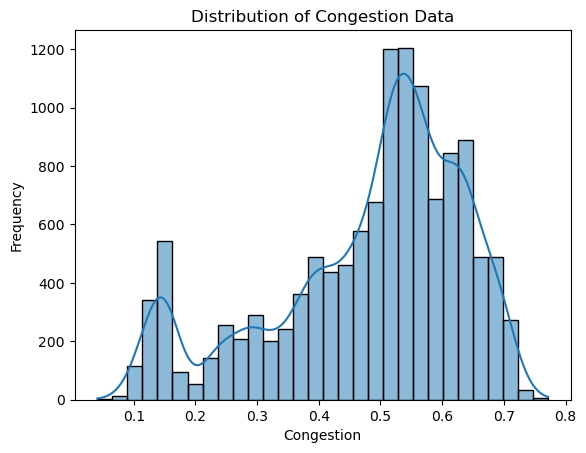

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.histplot(daily_data_2024["congestion"], kde=True, bins=30)
plt.title("Distribution of Congestion Data")
plt.xlabel("Congestion")
plt.ylabel("Frequency")
plt.show()

In [23]:
daily_data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12691 entries, 0 to 12690
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        12691 non-null  object 
 1   DISTRICT    12691 non-null  Int64  
 2   congestion  12691 non-null  float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 310.0+ KB


In [24]:
daily_data_2024.to_csv("../data/traffic_density_2024.csv", index=False)